In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [2]:
plt.ion()

# 1

In [3]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [4]:
print(im_org.shape)

(512, 512)


In [5]:
print(im_org.dtype)

uint8


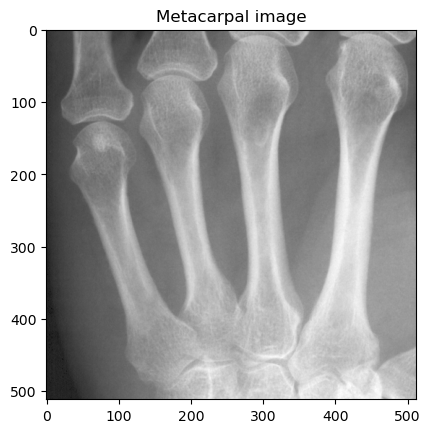

In [6]:
# io.imshow(im_org)
# Use plt to show the image instead
plt.imshow(im_org, cmap='gray')
plt.title('Metacarpal image')
plt.show()

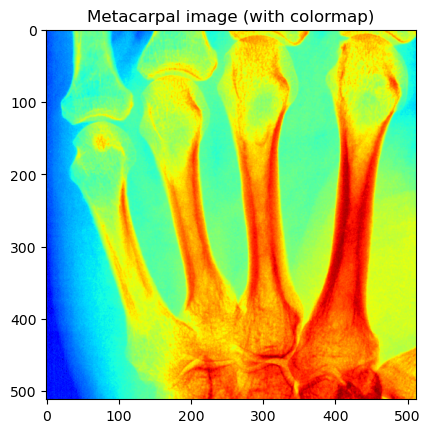

In [7]:
plt.imshow(im_org, cmap='jet')
plt.title('Metacarpal image (with colormap)')
plt.show()

cool, hot, pink, copper, coolwarm, cubehelix, and terrain.

Text(0.5, 1.0, 'terrain')

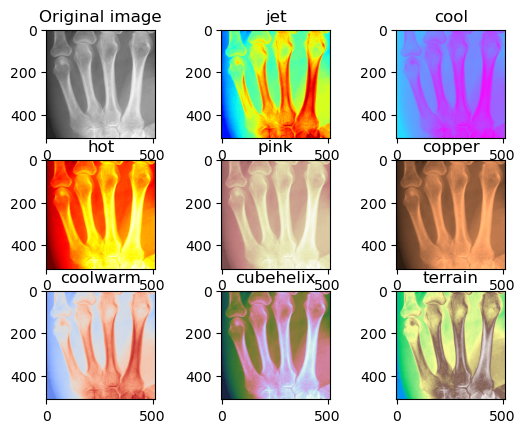

In [8]:
fig, ax = plt.subplots(3,3)
ax[0,0].imshow(im_org, cmap='gray')
ax[0,0].set_title('Original image')
ax[0,1].imshow(im_org, cmap='jet')
ax[0,1].set_title('jet')
ax[0,2].imshow(im_org, cmap='cool')
ax[0,2].set_title('cool')
ax[1,0].imshow(im_org, cmap='hot')
ax[1,0].set_title('hot')
ax[1,1].imshow(im_org, cmap='pink')
ax[1,1].set_title('pink')
ax[1,2].imshow(im_org, cmap='copper')
ax[1,2].set_title('copper')
ax[2,0].imshow(im_org, cmap='coolwarm')
ax[2,0].set_title('coolwarm')
ax[2,1].imshow(im_org, cmap='cubehelix')
ax[2,1].set_title('cubehelix')
ax[2,2].imshow(im_org, cmap='terrain')
ax[2,2].set_title('terrain')

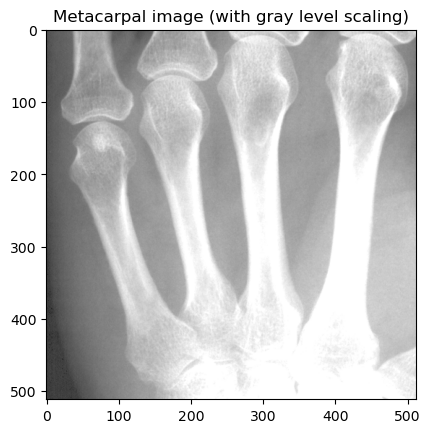

In [9]:
plt.imshow(im_org, vmin=20, vmax=170, cmap='gray')
plt.title('Metacarpal image (with gray level scaling)')
plt.show()

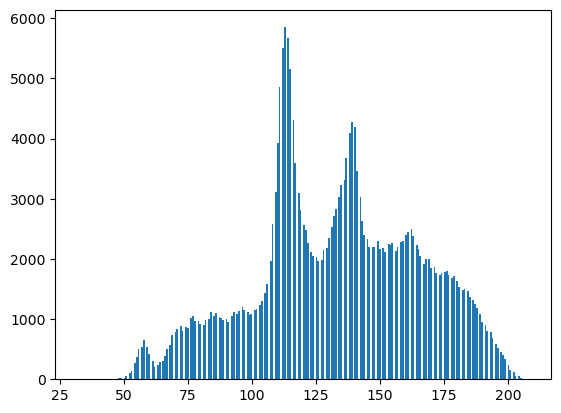

In [10]:
h = plt.hist(im_org.ravel(), bins=256)

In [11]:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


In [12]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


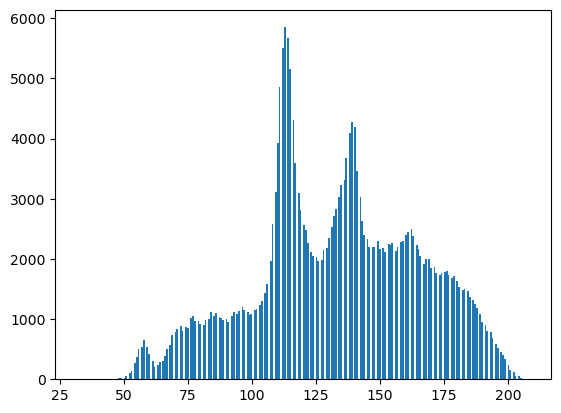

In [13]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

np.float64(63576.0)

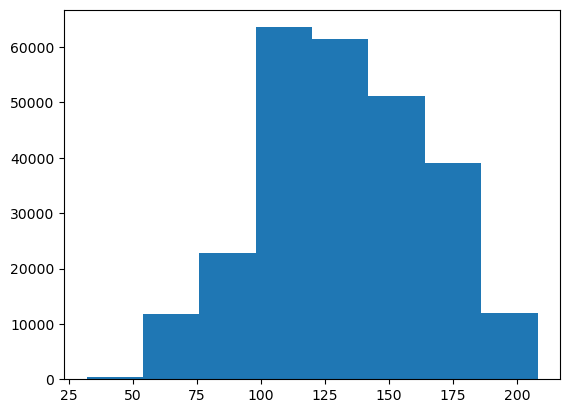

In [14]:
y, x, _ = plt.hist(im_org.ravel(), bins=8)
max(y)

In [15]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


In [16]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


/tmp/ipykernel_48273/2087507526.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/tmp/ipykernel_48273/2087507526.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


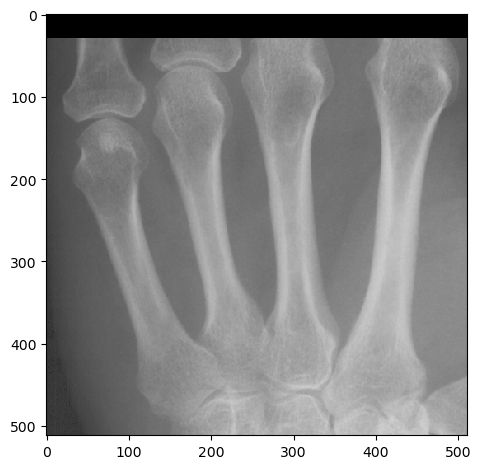

In [17]:
im_org[:30] = 0
io.imshow(im_org)
io.show()

This operation sets the value of the first 30 rows to black color.

/tmp/ipykernel_48273/2289077098.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mask)
/tmp/ipykernel_48273/2289077098.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


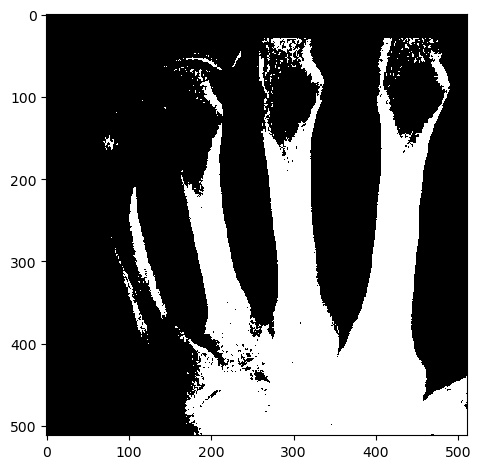

In [18]:
mask = im_org > 150
io.imshow(mask)
io.show()

They are 1 at the white pixels and 0 at the black pixels.

/tmp/ipykernel_48273/3122219897.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/tmp/ipykernel_48273/3122219897.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


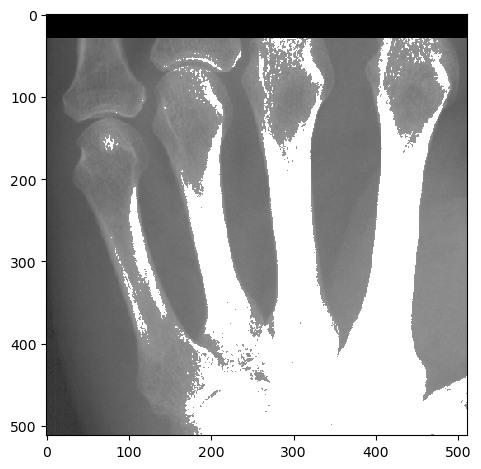

In [19]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

This code uses the previous mask to set all its values to white.

## Exercise 14

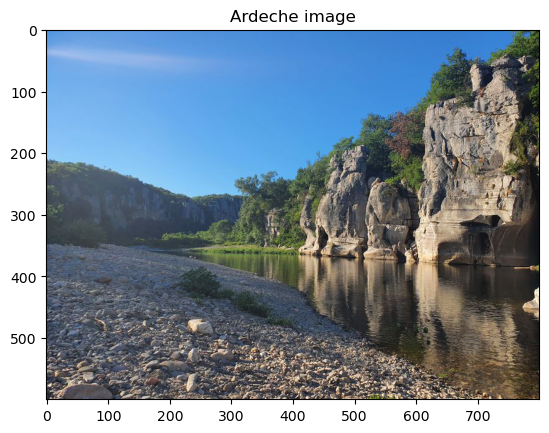

In [20]:
ardeche_img = io.imread(in_dir + "ardeche.jpg")

plt.imshow(ardeche_img, cmap='gray')
plt.title('Ardeche image')
plt.show()

In [21]:
print(ardeche_img.shape)

(600, 800, 3)


It has 600 rows and 800 columns with 3 color channels.

In [22]:
ardeche_img[110, 90]

array([119, 178, 238], dtype=uint8)

It has R119, G178, B238

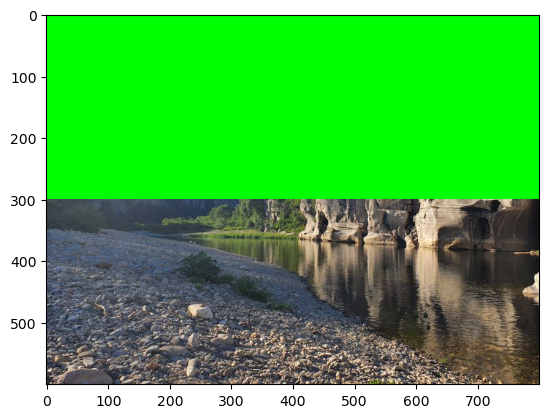

In [23]:
ardeche_clone = ardeche_img.copy()
ardeche_clone[:ardeche_clone.shape[0]//2, :] = [0, 255, 0]
plt.imshow(ardeche_clone)

In [24]:
my_img = io.imread(in_dir + "my_image.jpg")
my_img.shape

(480, 640, 3)

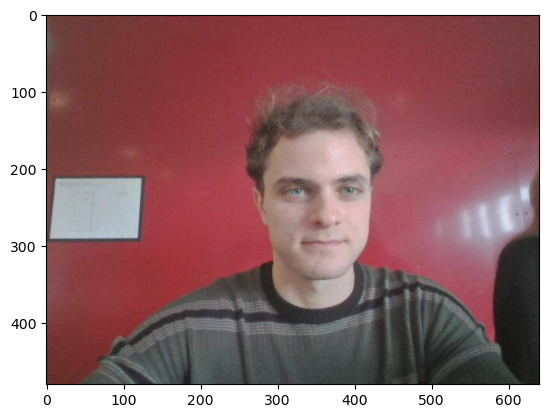

In [25]:
plt.imshow(my_img)

We shouldnt rescale by 0.25 as the dimensions are already quite small.

In [26]:
myimg_rescaled = rescale(my_img, 0.9, anti_aliasing=True,
                         channel_axis=2)

In [27]:
myimg_rescaled.shape

(432, 576, 3)

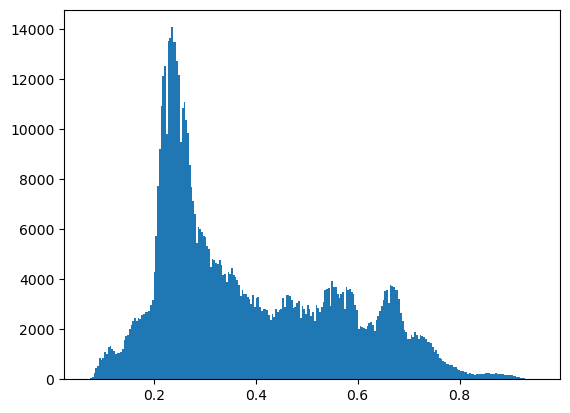

In [28]:
y, x, _ = plt.hist(myimg_rescaled.ravel(), bins=256)

The range is now floats from 0 to 1 instead of [0, 255].

## Exercise 19

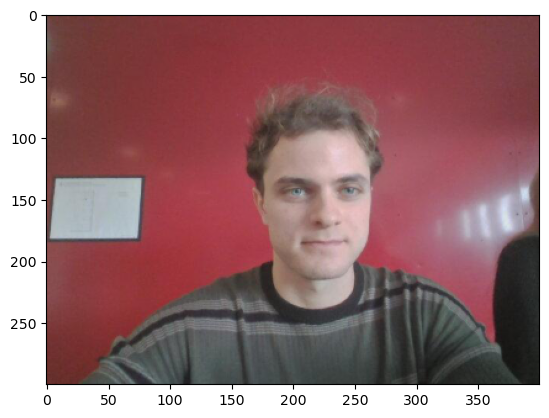

In [29]:
aspect_ratio = my_img.shape[0] / my_img.shape[1]
new_width = 400
# Always make it 400 width
# (r, c)
image_resized = resize(my_img, (new_width*aspect_ratio, new_width), anti_aliasing=True)
plt.imshow(image_resized)

In [30]:
im_gray = color.rgb2gray(image_resized)
im_byte = img_as_ubyte(im_gray)

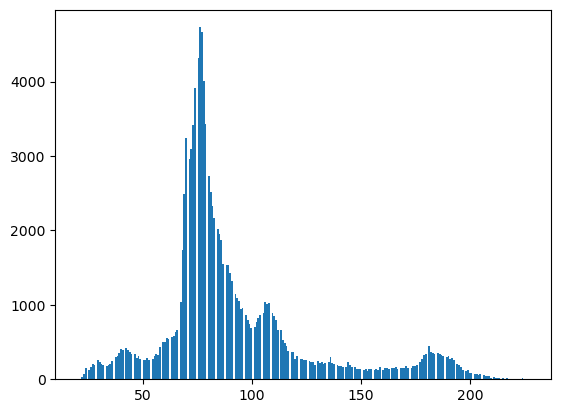

In [31]:
y, x, _ = plt.hist(im_byte.ravel(), bins=256)

In [32]:
dark_img = io.imread(in_dir + "dark.webp")
dark_img.shape

(973, 1500, 3)

In [33]:
bright_img = io.imread(in_dir + "bright.jpeg")
bright_img.shape

(2000, 3000, 3)

In [34]:
aspect_ratio = bright_img.shape[0] / bright_img.shape[1]
new_width = 1500
bright_img_resized = resize(bright_img, (new_width*aspect_ratio, new_width), anti_aliasing=True)
bright_img_resized.shape

(1000, 1500, 3)

/tmp/ipykernel_48273/879015217.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


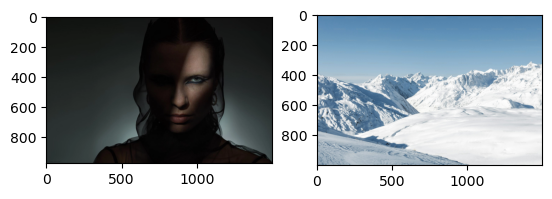

In [35]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(dark_img)
axs[1].imshow(bright_img_resized)
fig.show()

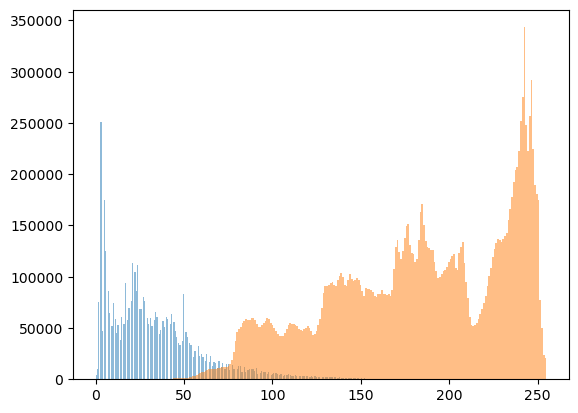

In [36]:
h1 = plt.hist(dark_img.ravel(), bins=256, alpha=0.5)
h2 = plt.hist(bright_img.ravel(), bins=256, alpha=0.5)

We see the dark image has colors in the low range, and the bright image has colors in the high range.

In [37]:
bright_on_dark_img = color.rgb2gray(io.imread(in_dir + "bright_on_dark.jpg"))
bright_on_dark_img.shape

(980, 1470)

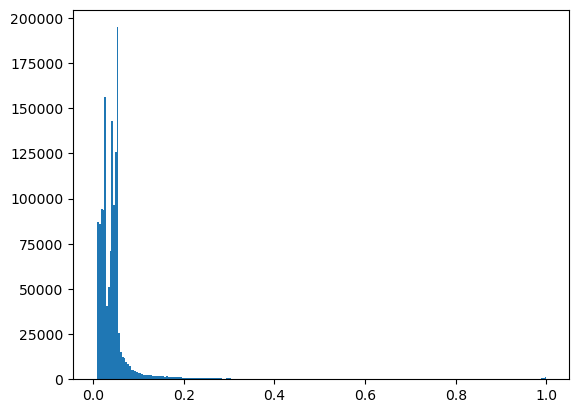

In [38]:
h3 = plt.hist(bright_on_dark_img.ravel(), bins=256)

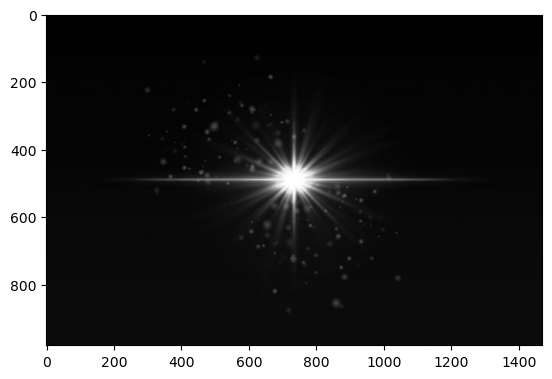

In [39]:
plt.imshow(bright_on_dark_img, cmap="gray")

Most of the image is dark, but we have few bright pixels, which is shown at 1.0 on the x-axis.

## Exercise 22

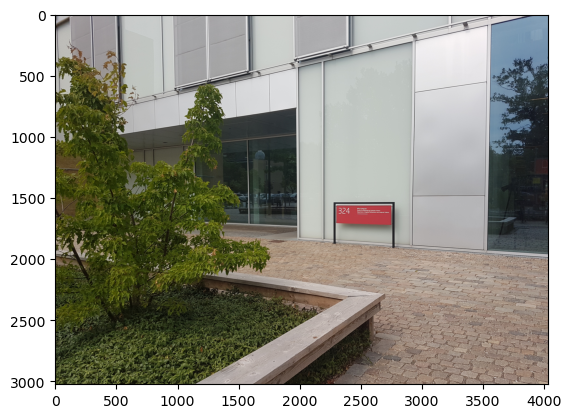

In [40]:
dtu_img = io.imread(in_dir + "DTUSign1.jpg")
plt.imshow(dtu_img)

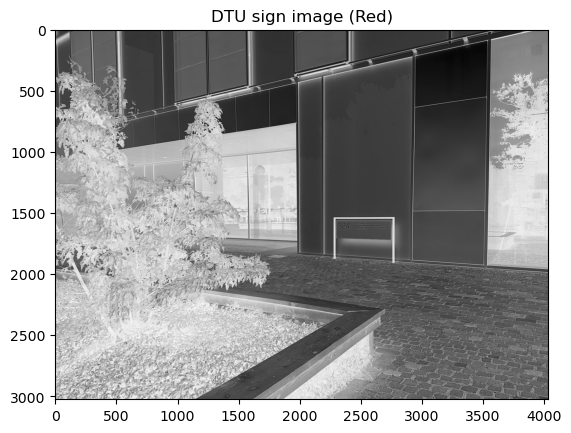

In [41]:
r_comp = dtu_img[:, :, 0]
plt.imshow(r_comp, cmap="binary")
plt.title('DTU sign image (Red)')
plt.show()

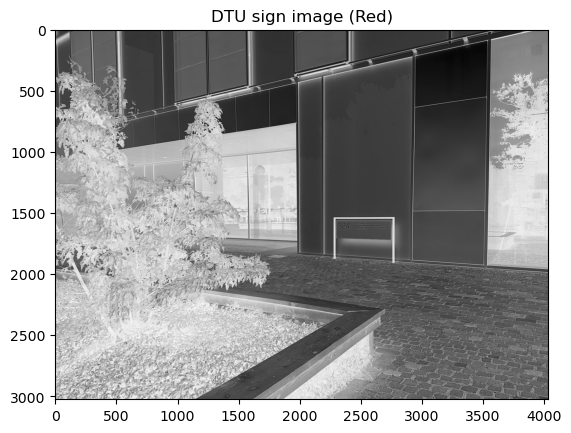

In [42]:
g_comp = dtu_img[:, :, 1]
b_comp = dtu_img[:, :, 2]
plt.imshow(r_comp, cmap="binary")
plt.title('DTU sign image (Red)')
plt.show()

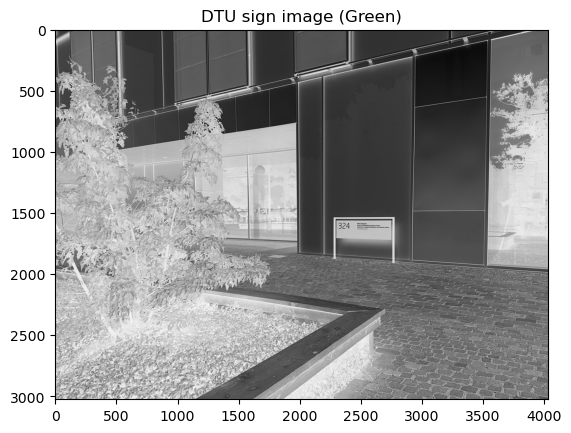

In [43]:
plt.imshow(g_comp, cmap="binary")
plt.title('DTU sign image (Green)')
plt.show()

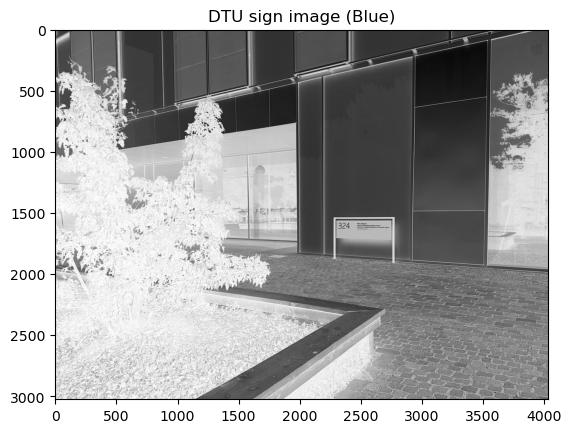

In [44]:
plt.imshow(b_comp, cmap="binary")
plt.title('DTU sign image (Blue)')
plt.show()

The way I plotted is a bit different so it has been reversed, since I use matplotlib. The sign is dark because the colors are mostly red.

## Exercise 25

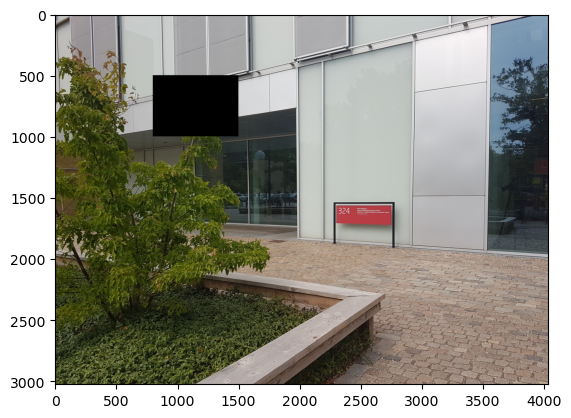

In [45]:
dtu_img_copy = dtu_img.copy()
dtu_img_copy[500:1000, 800:1500, :] = 0
plt.imshow(dtu_img_copy)

In [46]:
io.imsave("DTUSign1-marked.jpg", dtu_img_copy)

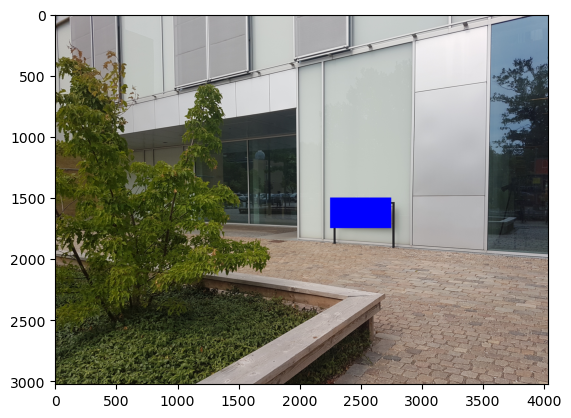

In [47]:
dtu_img_copy_blue = dtu_img.copy()
dtu_img_copy_blue[1500:1750, 2250:2750, :] = 0
dtu_img_copy_blue[1500:1750, 2250:2750, 2] = 255
plt.imshow(dtu_img_copy_blue)

In [48]:
io.imsave("DTUSign1-marked_bluesign.jpg", dtu_img_copy_blue)

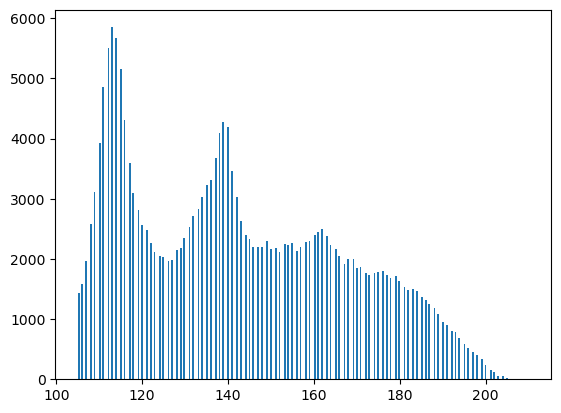

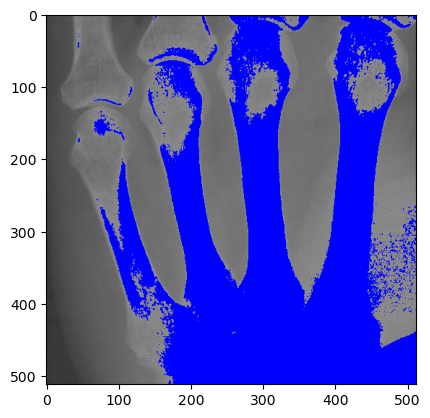

In [49]:
metacarpals_img = io.imread(in_dir + "metacarpals.png")

plt.hist(metacarpals_img.ravel(), bins=256, range=(105, 210))
plt.show()

mask = (metacarpals_img > 140)
metargb = color.gray2rgb(img_as_ubyte(metacarpals_img))
metargb[mask] = [0, 0, 255]

plt.imshow(metargb)
plt.show()

Can't seem to get all bones just from thresholding...

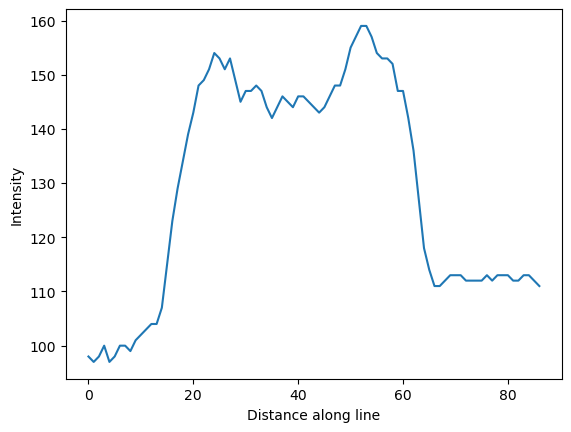

In [50]:
im_org = io.imread(in_dir + "metacarpals.png")
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

I think the first and second peak represents the bone edges while the in between intensities represent the middle of the bone with lower intensities.

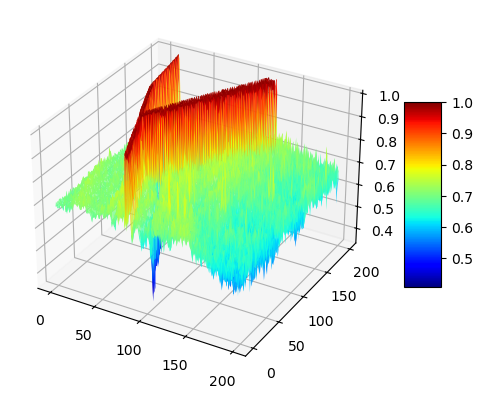

In [51]:
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Exercise 29

In [52]:
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 174
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008,0020) Study Date                          DA: '20140914'
(0008,0030) Study Time                          TM: ''
(0008,0050) Accession Number        

The size is 512x512

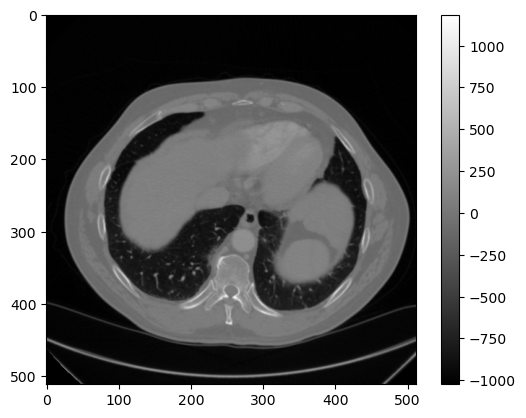

In [62]:
im = ds.pixel_array
plt.imshow(im, cmap='gray', vmin=-1024, vmax=1185)
plt.colorbar()

In [56]:
im.shape

(512, 512)

The image is 512x512 and grayscale meaning only one channel for colors.

In [57]:
min(im.ravel()), max(im.ravel())

(np.int16(-1024), np.int16(1185))

The gray colors ranges from -1024 to 1185: range of 2210 different gray values. The size matches the size described in the header information.

In [ ]:
# The statement above 